Вариант 5

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
zoo = pd.read_csv('zoo.csv')
cls = pd.read_csv('class.csv')

In [ ]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

zoo.csv: этот набор данных состоит из 101 животного из зоопарка. Существует 16 переменных с различными признаками для описания животных. 7 типов классов: млекопитающие, птицы, рептилии, рыбы, амфибии, насекомые и беспозвоночные.

Описание признаков zoo.csv:

    1. animal_name - Уникальный для каждого экземпляра
    2. hair, Boolean — наличие/отсутствие шерсти
    3. feathers, Boolean -  наличие/отсутствие оперения
    4. eggs, Boolean — яйцекладущее или нет
    5. milk, Boolean — производит молоко или нет
    6. airborne, Boolean — может ли летать
    7. aquatic, Boolean — морское ли животное
    8. predator, Boolean — хищник или нет
    9. toothed, Boolean — наличие зубов
    10. backbone, Boolean — наличие позвоночника
    11. breathes, Boolean — отсутствие возможности дышать под водой
    12. venomous, Boolean — наличие яда
    13. fins, Boolean — наличие жабер
    14. legs, Числовой (набор значений: {0,2,4,5,6,8}) — количество ног
    15. tail, Boolean — наличие хвоста
    16. domestic, Boolean — одомашненное/дикое
    17. catsize, Boolean — размер по сравнению с котом (0 – меньше, 1 – больше)
    18. class_type, Числовой (целочисленные значения в диапазоне [1,7]) — тип класса

class.csv: набор данных описывает классы.

Описание признаков class.csv:

    1. Class_Number — номер класса
    2. Number_Of_Animal_Species_In_Class — количество животных в классе
    3. Class_Type — тип класса
    4. Animal_Names — названия животных в классе

1.2 Проанализируйте колонки в наборе данных и сделайте вывод в какой колонке находятся целевые классы, которые нужно прогнозировать. Определите, какая задача будет решаться (много классовая или бинарная классификация)

Целевой класс - колонка class_type. Решается задача многоклассовой классификации.

2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [ ]:
zoo.shape

(101, 18)

In [60]:
zoo=zoo.dropna()

In [ ]:
zoo.shape

(101, 18)

In [ ]:
zoo.duplicated().sum()

np.int64(0)

In [61]:
zoo.drop_duplicates(inplace=True)

In [ ]:
zoo.shape

(101, 18)

3. Оцените сбалансированность данных по классам.

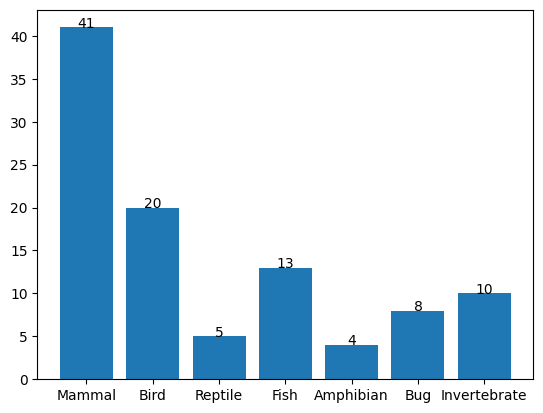

In [ ]:
plt.bar(cls['Class_Type'],cls['Number_Of_Animal_Species_In_Class'])
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')
add_labels(cls['Class_Type'], cls['Number_Of_Animal_Species_In_Class'])
plt.show()

3.1 Используя информацию о балансе классов, выберите какую кривую использовать для оценки классификатора (ROC или PR)

В наборе данных преимущество имеет класс млекопитающих, наблюдается недостаток животных класса рептилий и амфибий. Выберем PR кривую - она больше подходит для несбалансированных наборов данных.

3.2 Удалите выбросы из числовых данных. Используйте критерий 1.5-межквантильного интервала. Приведите диаграммы BoxPlot до и после удаления выбросов

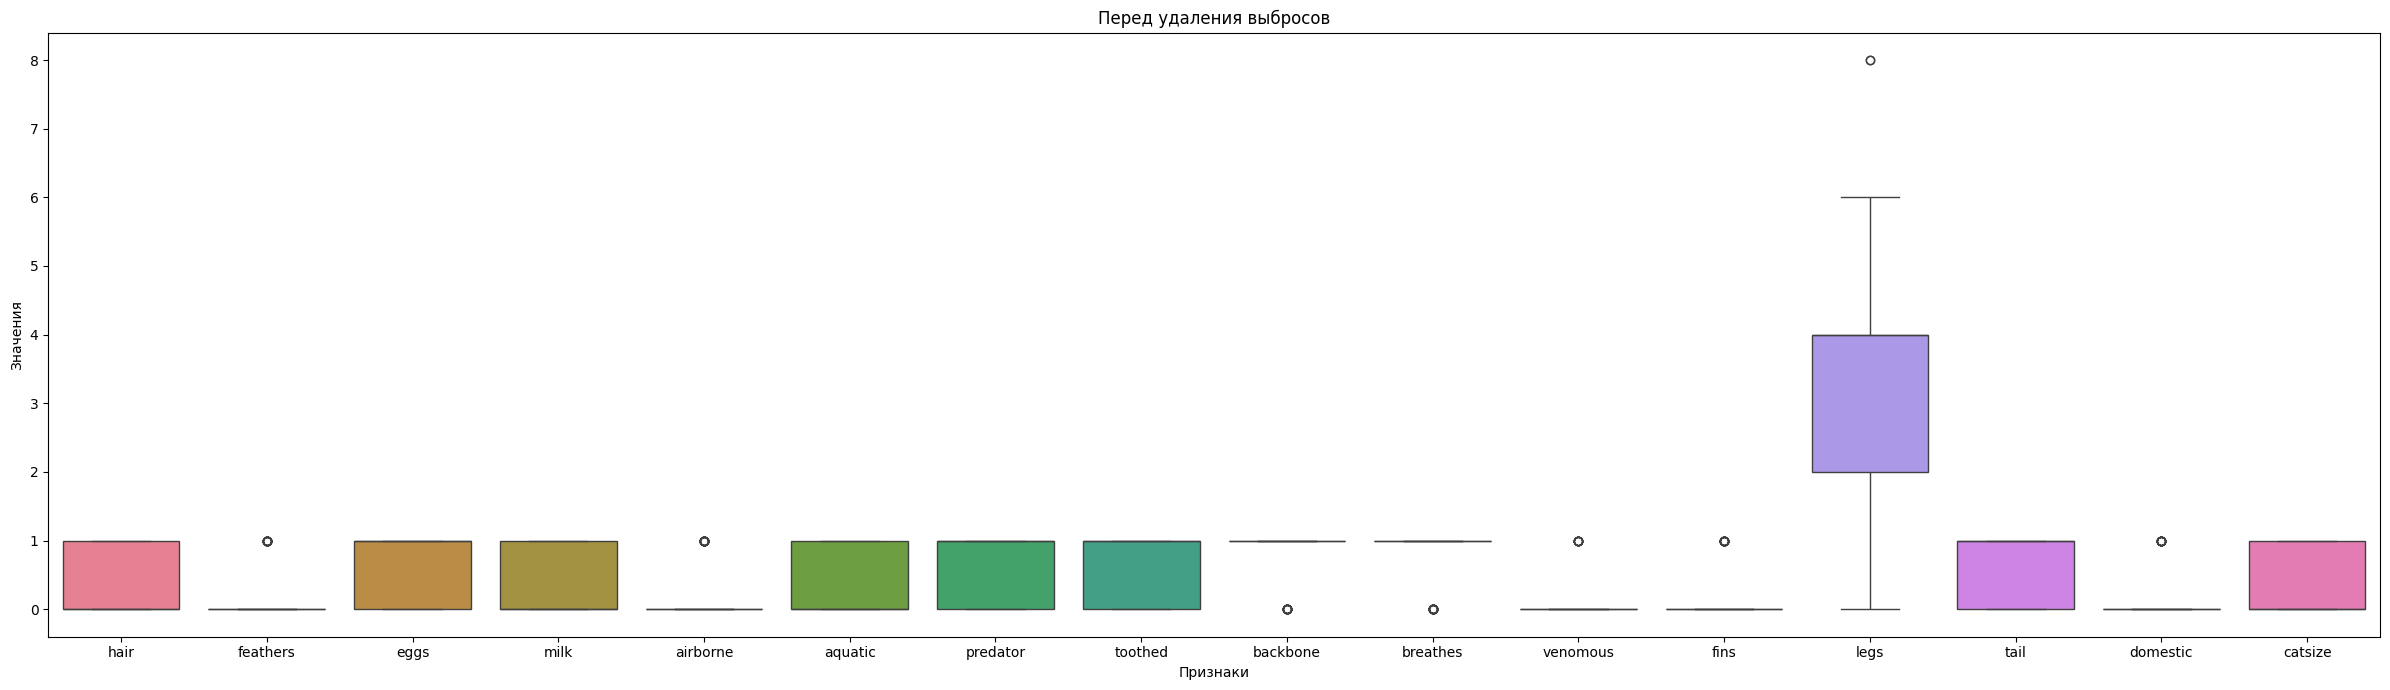

In [ ]:
plt.figure(figsize=(24, 7))

df_features = zoo.select_dtypes(include='number').drop('class_type',axis=1)

sns.boxplot(data=df_features)
plt.title('Перед удаления выбросов')
plt.xlabel('Признаки')
plt.ylabel('Значения')

plt.tight_layout()
plt.show()

In [62]:
Q1, Q3 = zoo['legs'].quantile([0.25, 0.75])
IQR = Q3 - Q1
bottom, top = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
zoo['legs'] = zoo['legs'][(zoo['legs'] >= bottom) & (zoo['legs'] <= top)]

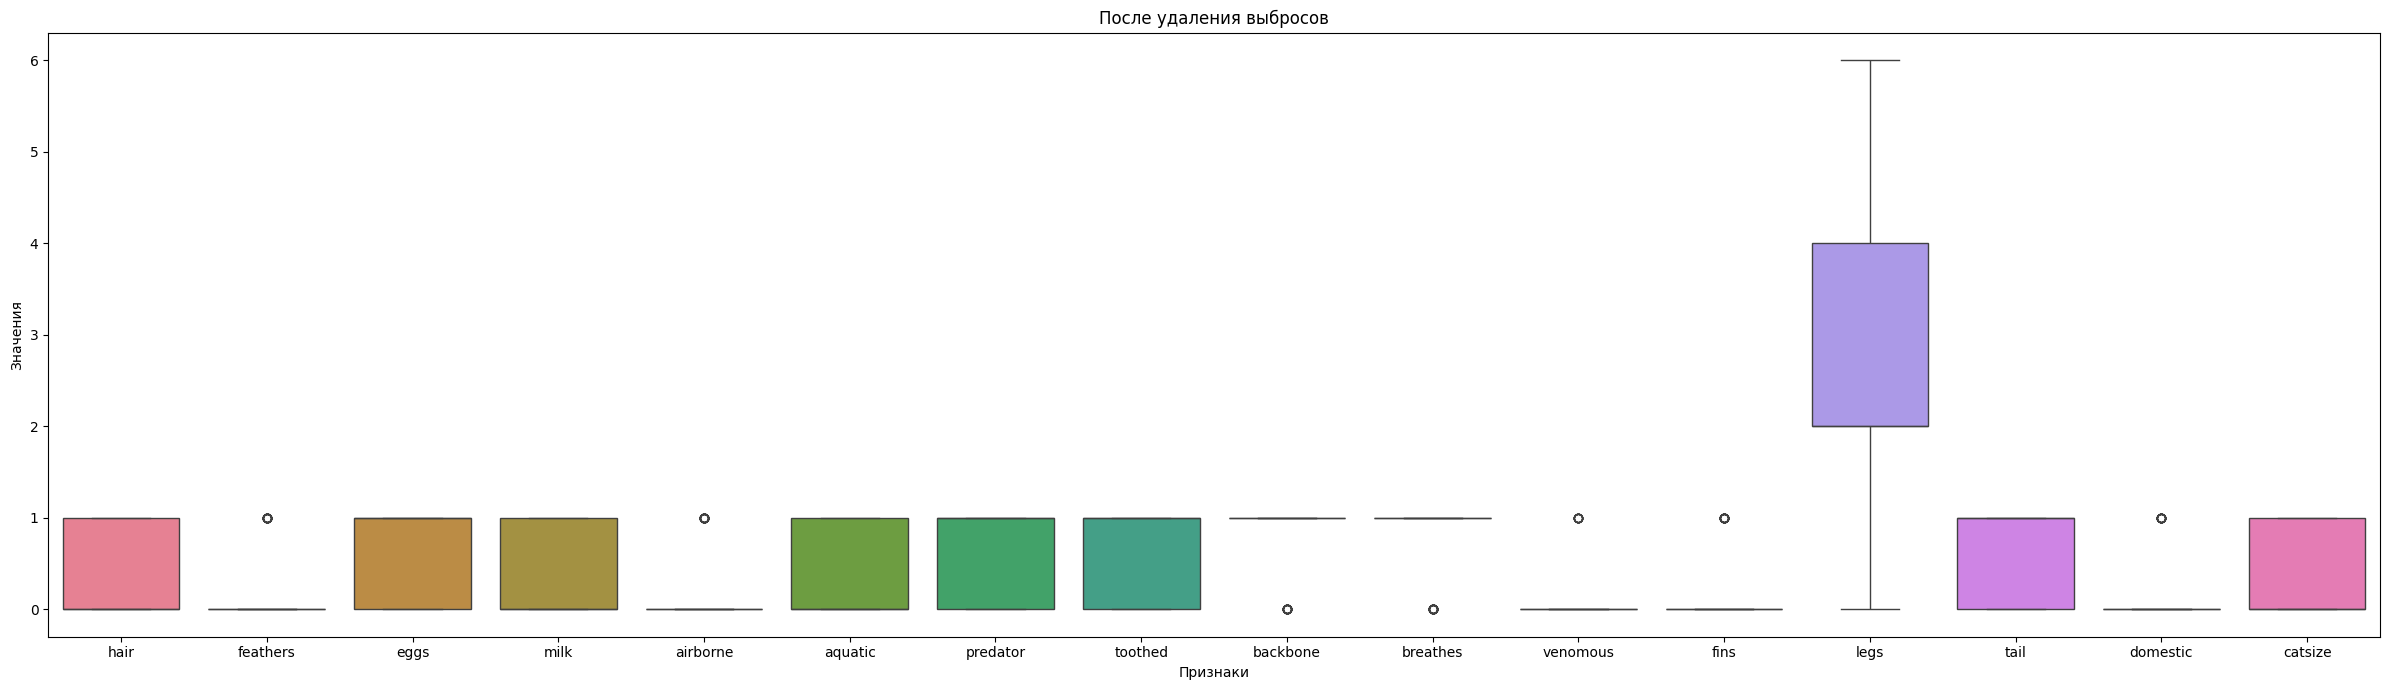

In [ ]:
plt.figure(figsize=(24, 7))
df_features = zoo.select_dtypes(include='number').drop('class_type',axis=1)
sns.boxplot(data=df_features)
plt.title('После удаления выбросов')
plt.xlabel('Признаки')
plt.ylabel('Значения')

plt.tight_layout()
plt.show()

3.3 Заполните пропущенные значения в данных; (используйте sklearn imputers для числовых, категориальные кроме целевой колонки заполнить нейтральными значениями). Указать количество нулевых значений по колонкам до и после заполнения.

In [ ]:
zoo.isnull().sum()

,0
animal_name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [63]:
from sklearn.impute import KNNImputer
X = zoo[['legs']].values

imputer = KNNImputer()
X=imputer.fit_transform(X)

zoo['legs']=X

In [6]:
zoo.isnull().sum()

,0
animal_name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


4. Выполните масштабирование количественных (числовых) признаков:
        a. Постройте диаграммы BoxPlot для признаков до масштабирования.

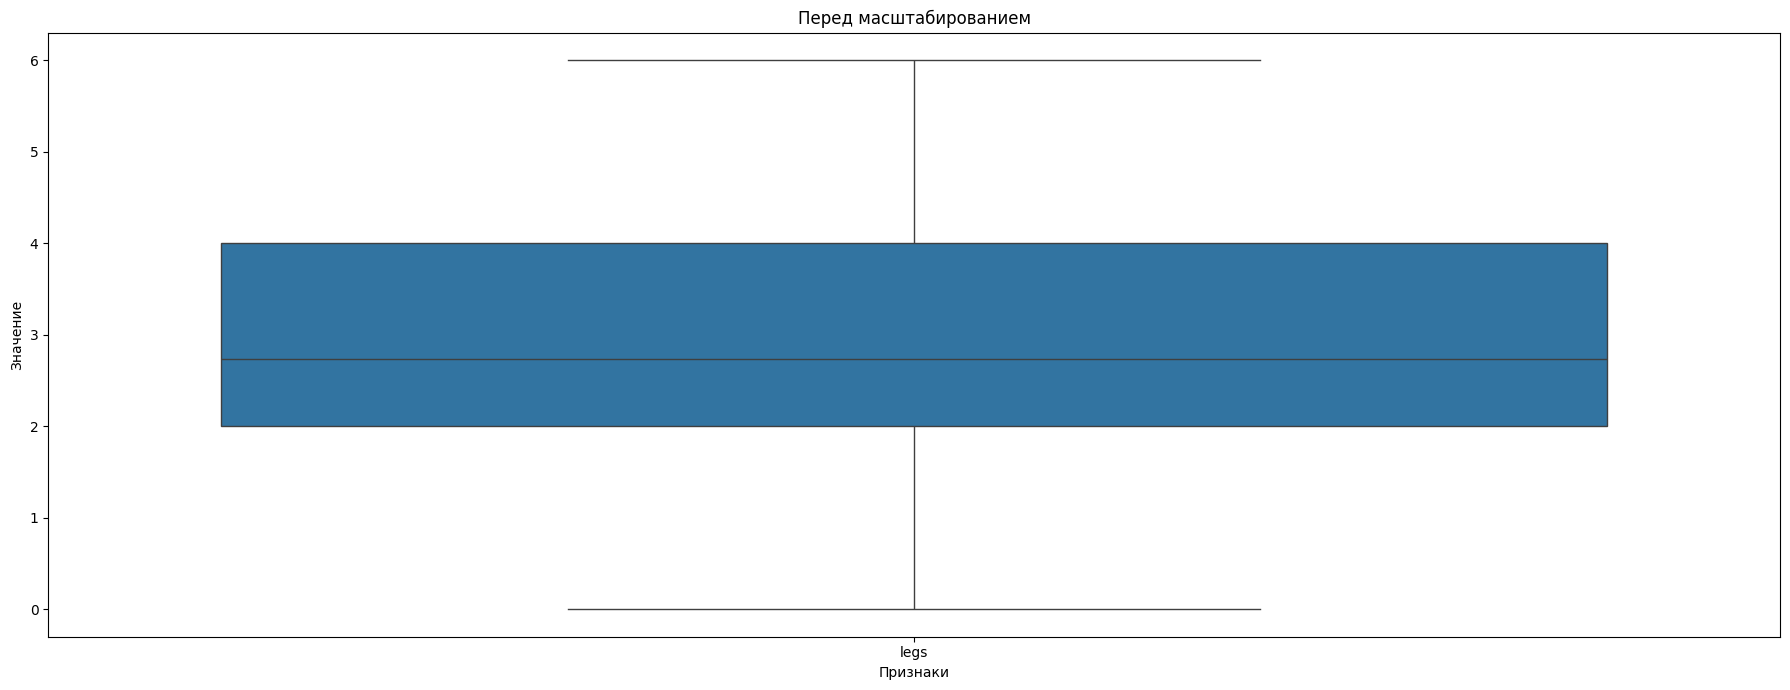

In [7]:
plt.figure(figsize=(18, 7))

df_features = zoo[['legs']].copy()

sns.boxplot(data=df_features)
plt.title('Перед масштабированием')
plt.xlabel('Признаки')
plt.ylabel('Значение')

plt.tight_layout()
plt.show()

b. Выберите способ масштабирования (например, нормализацию или стандартизацию MinMaxScaler, StandardScaler)

Для масштабированя была выбрана нормализация. Нормализация используется в алгоритмах, основанных на расстояниях, таких как K-NN, который будет задействован позднее. Бинарные признаки масштабироваться не будут.

c. Выполните масштабирование выбранным методом

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_features)
zoo['legs'] = pd.DataFrame(scaled, columns=['legs'])

d. Постройте диаграммы BoxPlot для признаков после масштабирования.

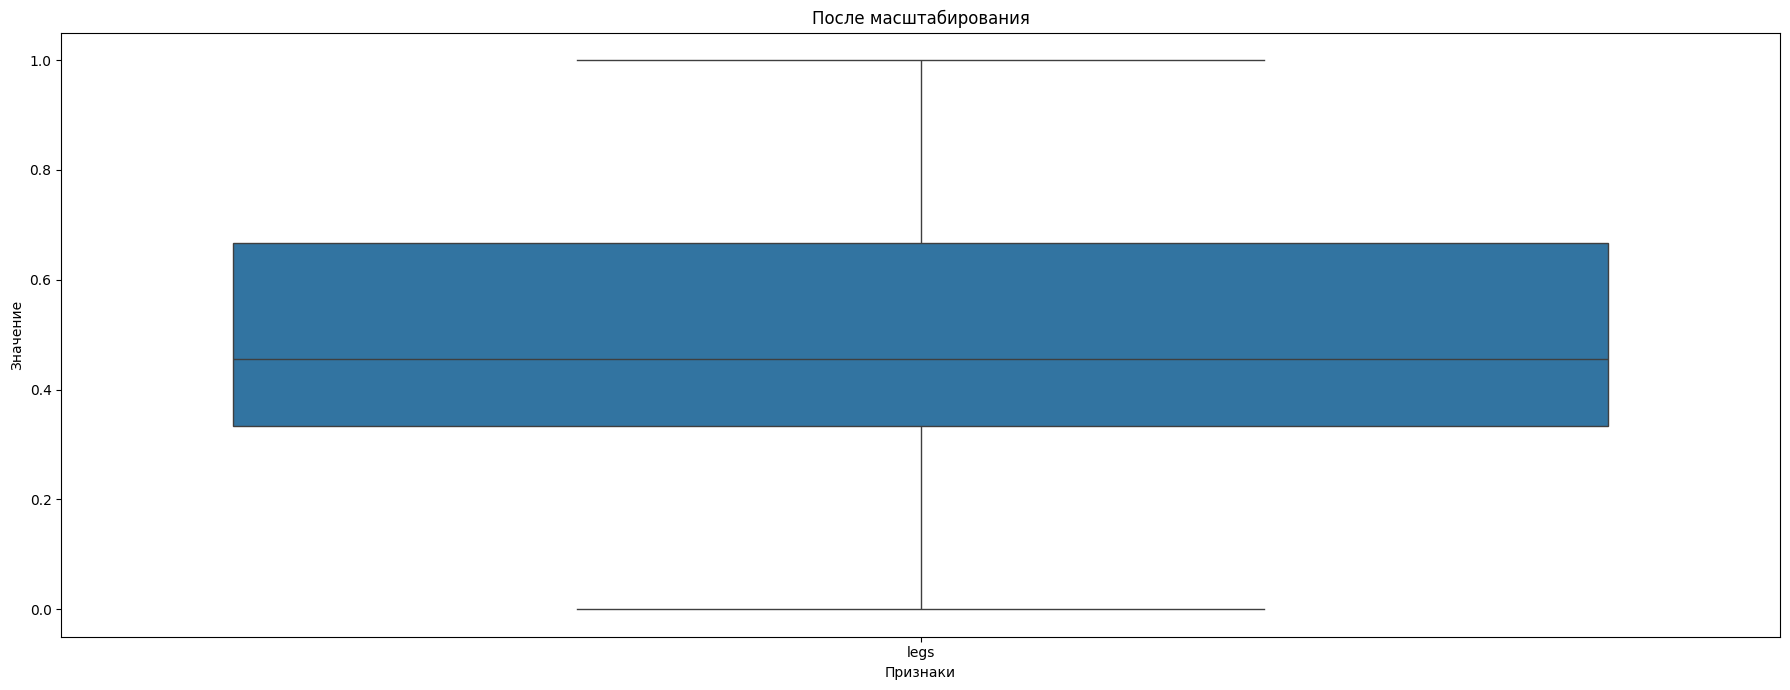

In [9]:
plt.figure(figsize=(18, 7))

df_features = zoo[['legs']].copy()

sns.boxplot(data=df_features)
plt.title('После масштабирования')
plt.xlabel('Признаки')
plt.ylabel('Значение')

plt.tight_layout()
plt.show()

5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены; (label encoder и one hot encoder)

Единственный категориальный признак - animal_name. Имена уникальны, смысла для тренировки не несут.

In [65]:
zoo = zoo.drop('animal_name',axis=1)

6. Оцените корреляцию между признаками, постройте матрицу корреляции. Найдите признаки, которые коррелируют с наибольшим числом других и выпишите их (все кроме целевой колонки). Если в вашем задании указан линейный классификатор, то удалите признаки с высокой корреляцией.

Так как задачей было найти признак с наибольшим числом корреляций, положительных и отрицательных, значения корреляции были взяты в модуле.

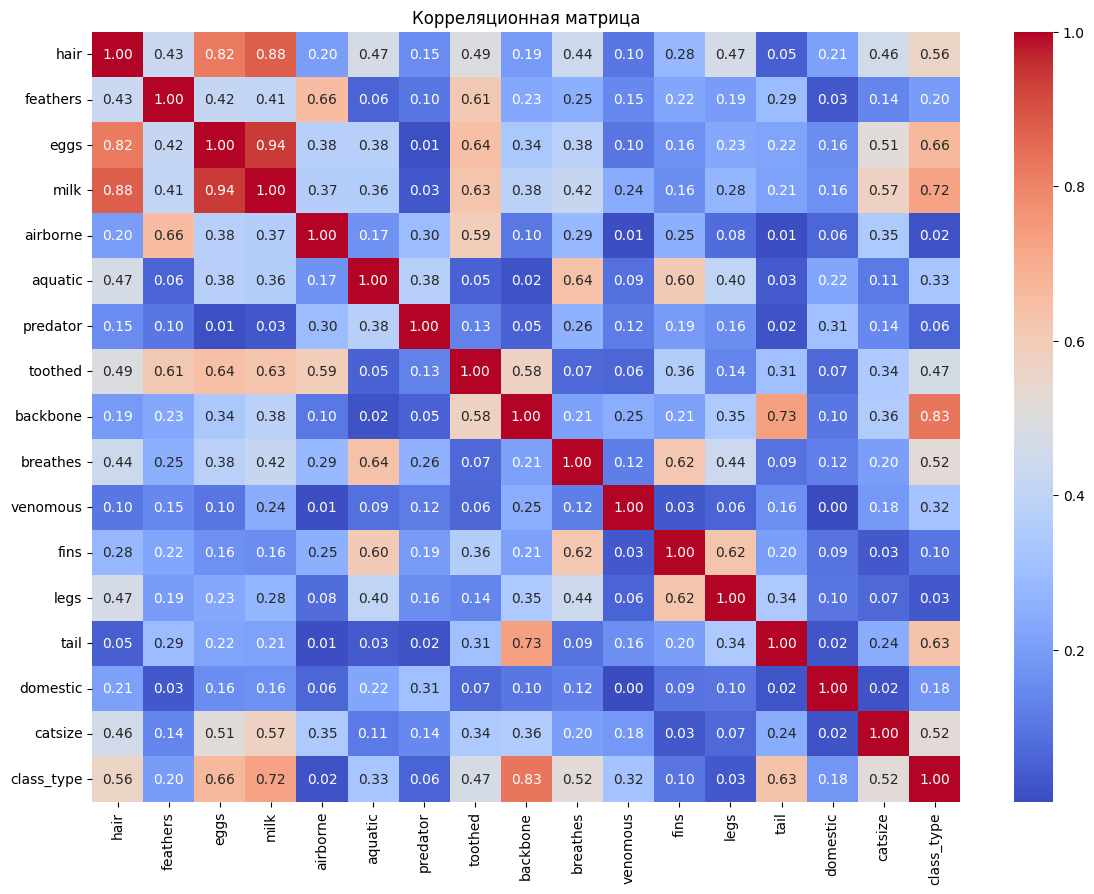

In [ ]:
df = zoo.copy()

correlation_matrix = df.corr().abs()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

Признаки, коррелирующие с наибольшим кол-вом других: fins, breathes, backbone, milk.

7. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

7. Решите поставленную задачу классификации (см. пункт 2):
  
  a. Разделите набор данных на две выборки: обучение и тест

In [68]:
from sklearn.model_selection import train_test_split
X = zoo.drop(['class_type'], axis=1)
y = zoo['class_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

Набор был разделен на выборки в соотношении 70/30. stratify=y сохраняет пропорции классов в тренировочном и тестовом наборах, важно для несбалансированных датасетов.



 b. По каждому классификатору из задания варианта параметры для него и возможные значения для этих параметров.

1 – классификатор K ближайших соседей (задаётся количество ближайших объектов)

1.   n_neighbors - количество ближайших соседей, используемых для предсказания
2.   weights - способ вычисления весов объектов из набора K ближайших соседей. Возможные значения: uniform (одинаковый вес для всех точек) и distance (веса, пропорциональные обратному расстоянию).  
3. algorithm - выбор из трех различных алгоритма ближайших соседей: «auto», «ball_tree», «kd_tree», «brute». brute будет использовать поиск методом перебора. auto попытается выбрать наиболее подходящий алгоритм.
4. leaf_size - размер листа
5. p - порядок расстояния Минковского между точками
6. metric - метрика, по которой считаются ближайшие соседи. По умолчанию - minkowski. Если метрика precomputed, то предполагается, что X является матрицей расстояний и при тренировке должна быть квадратной. Если метрика является вызываемой функцией, она принимает в качестве входных данных два массива, представляющих одномерные векторы, и должна возвращать одно значение, указывающее расстояние между этими векторами.
7. metric_params - дополнительные аргументы для функции metric
8. n_jobs - количество параллельных заданий, выполняемых для поиска соседей. По умолчанию None(1). -1 означает использование всех процессоров.

---

4 – логический классификатор (бинарное решающее дерево). DTC

1. criterion - Ффункция, которая измеряет качество разделения. Поддерживаются следующие значения: «gini», «entropy», «log_loss». По умолчанию установлен вариант «gini»
2. splitter - Стратегия, используемая для выбора разделения на каждом узле. Поддерживаются стратегии “best” для выбора наилучшего разделения и “random” для выбора наилучшего случайного разделения.
3. max_depth - Максимальная глубина дерева. Если None, то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать меньше выборок чем min_samples_split.
4. min_samples_split - Минимальное количество выборок, необходимое для разделения внутреннего узла
5. min_samples_leaf - Минимальное количество выборок, которое должно быть в конечном узле.
6. max_features - Количество функций, которые следует учитывать при поиске наилучшего варианта разделения
7. random_state - Чтобы получить детерминированное поведение во время тренировки, значение random_state должно быть зафиксировано числом.
8. class_weight - Веса, связанные с классами, задаются в виде {class_label: weight}. Если нет, то все классы должны иметь вес 1.

d. Многоклассовая классификация:
    
  i. Постройте классификацию по схеме «один-против-всех» для подбора параметров используйте GridSearchCV. Обоснуйте выбор метрики для параметра refit в GridSearchCV.

Была выбрана метрика f1_macro. Она вычисляет оценку F1 для каждого класса независимо, а затем вычисляет средневзвешенное значение. При этом все классы оцениваются одинаково, независимо от их размера. f1_macro обеспечивает сбалансированную оценку по всем классам, что важно при несбалансированном датасете.

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

base_estimator = KNeighborsClassifier()
ovr_classifier_KNN = OneVsRestClassifier(base_estimator)

base_estimator = DecisionTreeClassifier(random_state=42)
ovr_classifier_DCT = OneVsRestClassifier(base_estimator)

param_grid_KNN = {
    'estimator__n_neighbors': [3, 5, 7],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__metric': ['euclidean', 'manhattan']
}
param_grid_DCT = {
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__splitter': ['best', 'random'],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_samples_split': [2, 3, 5],
    'estimator__min_samples_leaf': [1, 2, 3],
    'estimator__max_features': ['sqrt', 'log2']
}

In [70]:
min_class_count = y_train.value_counts().min()
print(f"Минимальное количество значений в обучающей выборке: {min_class_count}")
cv_folds = min_class_count

grid_search_KNN = GridSearchCV(
    estimator=ovr_classifier_KNN,
    param_grid=param_grid_KNN,
    scoring='f1_macro',
    refit='f1_macro',
    cv=min_class_count,
    n_jobs=-1,
    verbose=1
)

grid_search_DCT = GridSearchCV(
    estimator=ovr_classifier_DCT,
    param_grid=param_grid_DCT,
    scoring='f1_macro',
    refit='f1_macro',
    cv=min_class_count,
    n_jobs=-1,
    verbose=1
)

Минимальное количество значений в обучающей выборке: 3


In [71]:
knn = grid_search_KNN.fit(X_train, y_train)
dct = grid_search_DCT.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [72]:
print(f"Лучшие параметры KNN: {knn.best_params_}")
print(f"Лучший результат кросс валидации KNN (f1_macro): {knn.best_score_:.4f}")

print(f"Лучшие параметры DCT: {dct.best_params_}")
print(f"Лучший результат кросс валидации DCT (f1_macro): {dct.best_score_:.4f}")

best_ovr_model_knn = knn.best_estimator_
y_pred_knn = best_ovr_model_knn.predict(X_test)

best_ovr_model_dct = dct.best_estimator_
y_pred_dct = best_ovr_model_dct.predict(X_test)

print(f'\nДля KNN:\n{classification_report(y_test, y_pred_knn)}')
print(f'Для Decision Tree:\n{classification_report(y_test, y_pred_dct)}')

Лучшие параметры KNN: {'estimator__metric': 'euclidean', 'estimator__n_neighbors': 3, 'estimator__weights': 'distance'}
Лучший результат кросс валидации KNN (f1_macro): 0.9290
Лучшие параметры DCT: {'estimator__criterion': 'gini', 'estimator__max_depth': 3, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__splitter': 'best'}
Лучший результат кросс валидации DCT (f1_macro): 0.9290

Для KNN:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.97      0.93      0.94        31

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Оцените качество классификации каждого класса в отдельности по выбранной кривой из пункта 5.

In [73]:
num_class = dict(zip(cls['Class_Number'],cls['Class_Type']))
num_class

{1: 'Mammal',
 2: 'Bird',
 3: 'Reptile',
 4: 'Fish',
 5: 'Amphibian',
 6: 'Bug',
 7: 'Invertebrate'}

In [74]:
from sklearn.preprocessing import label_binarize
classes = best_ovr_model_knn.classes_
Y_test_binarized = label_binarize(y_test, classes=classes)

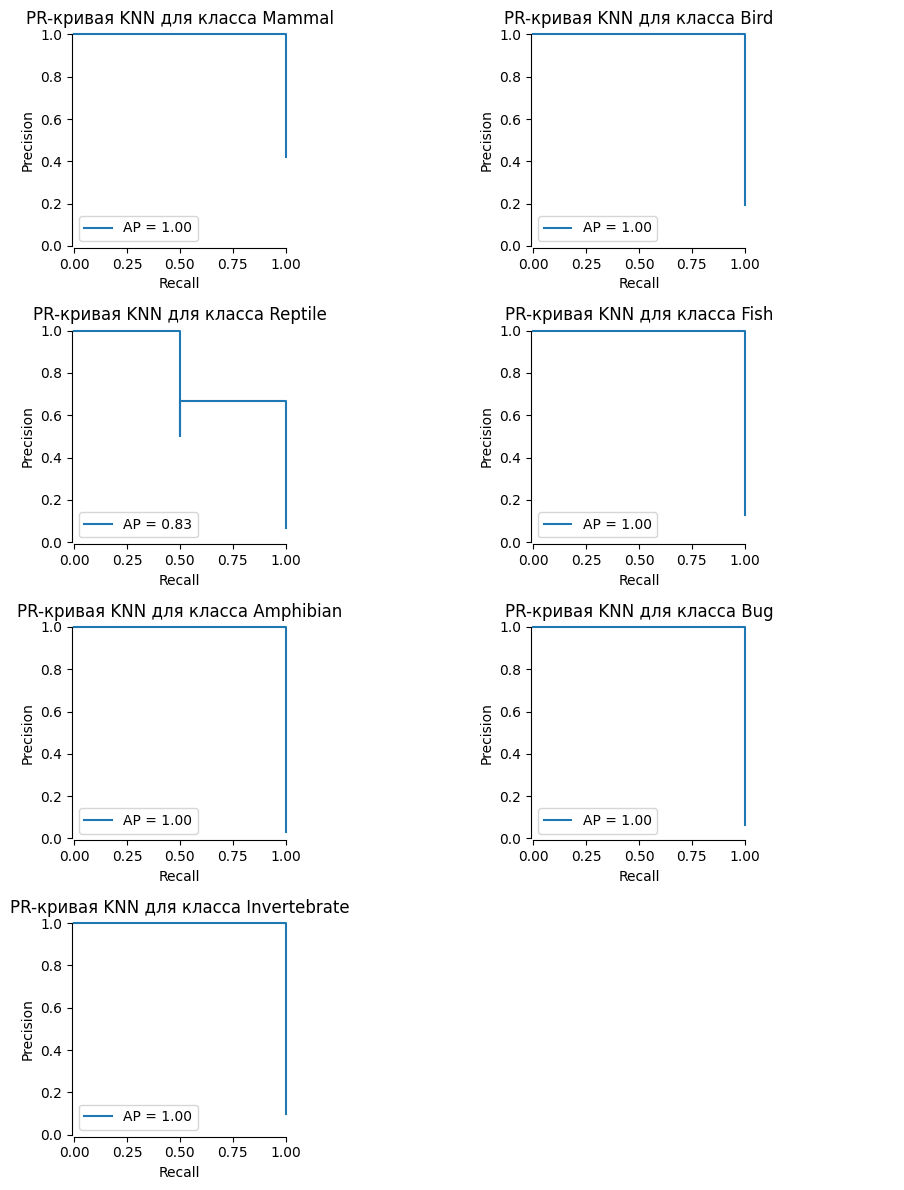

In [75]:
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

precision_knn = dict()
recall_knn = dict()
average_precision_knn = dict()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.ravel()

for x in range(7):
  y_score = best_ovr_model_knn.predict_proba(X_test)[:,x]
  y_true = Y_test_binarized[:, x]

  precision_knn[x], recall_knn[x], _ = precision_recall_curve(y_true, y_score)
  average_precision_knn[x] = average_precision_score(y_true, y_score)

  display = PrecisionRecallDisplay(
    recall=recall_knn[x],
    precision=precision_knn[x],
    average_precision=average_precision_knn[x],
  )
  display.plot(ax=axes[x], plot_chance_level=False, despine=True)
  axes[x].set_title(f"PR-кривая KNN для класса {num_class[x+1]}")

axes[7].axis('off')

plt.tight_layout()
plt.show()

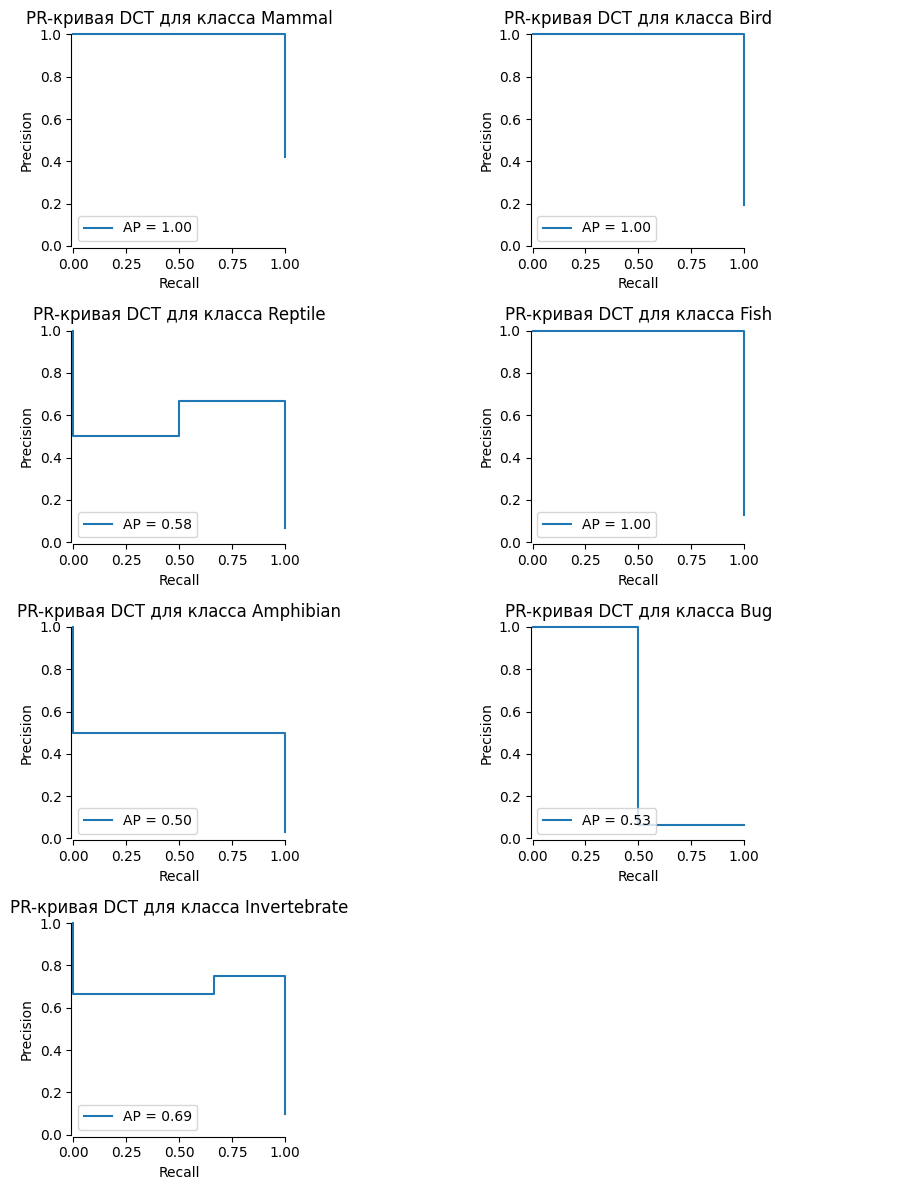

In [77]:
precision_dct = dict()
recall_dct = dict()
average_precision_dct = dict()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.ravel()

for x in range(7):
  y_score = best_ovr_model_dct.predict_proba(X_test)[:,x]
  y_true = Y_test_binarized[:, x]

  precision_dct[x], recall_dct[x], _ = precision_recall_curve(y_true, y_score)
  average_precision_dct[x] = average_precision_score(y_true, y_score)

  display = PrecisionRecallDisplay(
    recall=recall_dct[x],
    precision=precision_dct[x],
    average_precision=average_precision_dct[x],
  )
  display.plot(ax=axes[x], plot_chance_level=False, despine=True)
  axes[x].set_title(f"PR-кривая DCT для класса {num_class[x+1]}")

axes[7].axis('off')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Микро-усредненная PR-кривая для DCT')

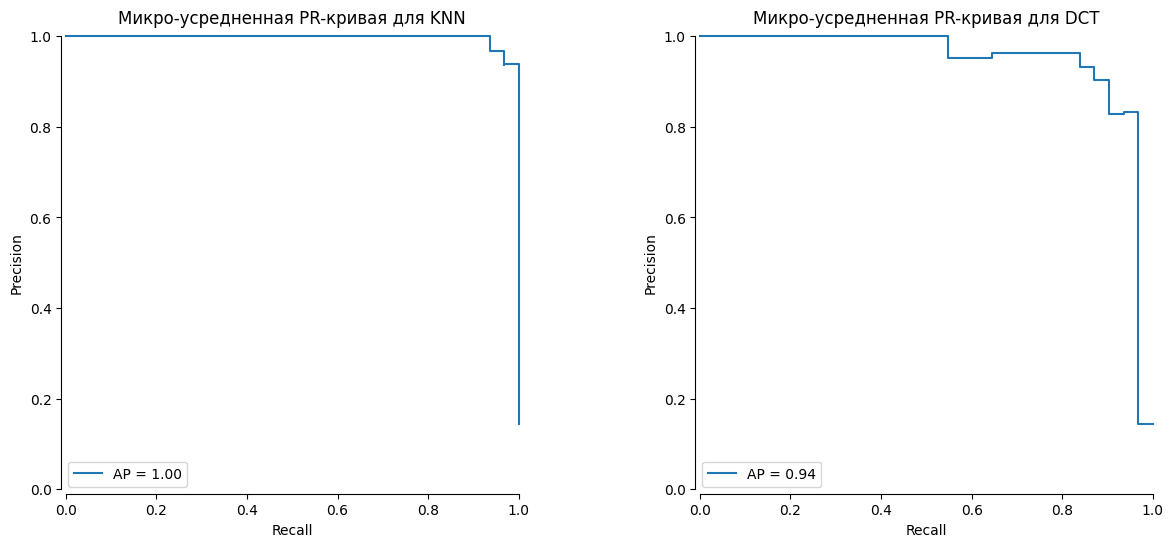

In [78]:
y_score_knn = best_ovr_model_knn.predict_proba(X_test)
y_score_dct = best_ovr_model_dct.predict_proba(X_test)
y_true = Y_test_binarized

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes = axes.ravel()


precision_knn["micro"], recall_knn["micro"], _ = precision_recall_curve(
    Y_test_binarized.ravel(), y_score_knn.ravel()
)
average_precision_knn["micro"] = average_precision_score(Y_test_binarized, y_score_knn, average="micro")

display = PrecisionRecallDisplay(
    recall=recall_knn["micro"],
    precision=precision_knn["micro"],
    average_precision=average_precision_knn["micro"],
)
display.plot(ax=axes[0], plot_chance_level=False, despine=True)
axes[0].set_title("Микро-усредненная PR-кривая для KNN")


precision_dct["micro"], recall_dct["micro"], _ = precision_recall_curve(
    Y_test_binarized.ravel(), y_score_dct.ravel()
)
average_precision_dct["micro"] = average_precision_score(Y_test_binarized, y_score_dct, average="micro")

display = PrecisionRecallDisplay(
    recall=recall_dct["micro"],
    precision=precision_dct["micro"],
    average_precision=average_precision_dct["micro"],
)

display.plot(ax=axes[1], plot_chance_level=False, despine=True)
axes[1].set_title("Микро-усредненная PR-кривая для DCT")

Text(0.5, 1.0, 'Макро-усредненная PR-кривая для DCT')

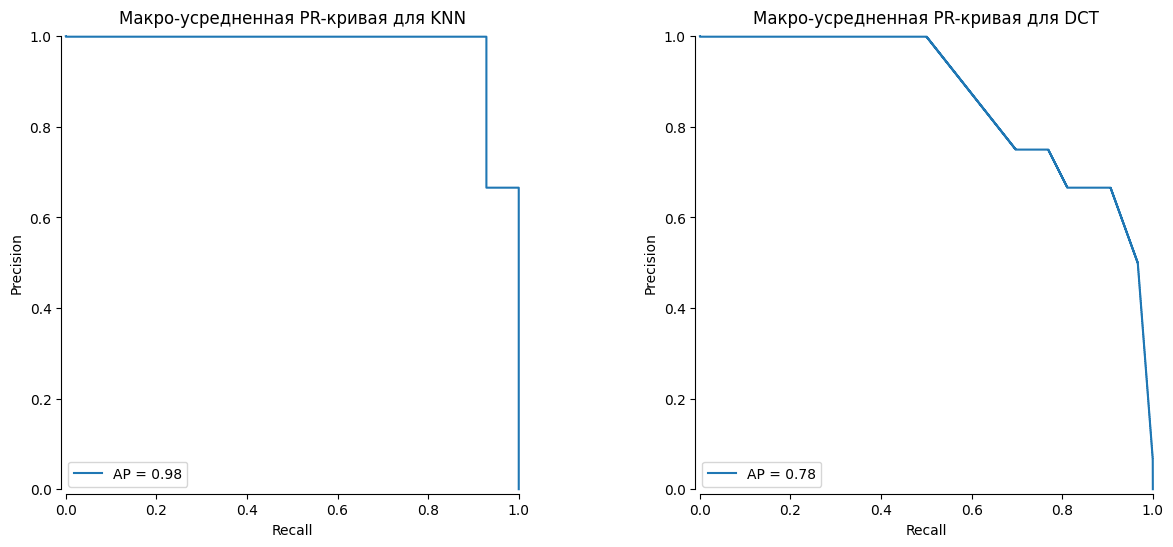

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes = axes.ravel()


fpr_grid = np.linspace(0.0, 1.0, 1000)

mean_tpr = np.zeros_like(fpr_grid)
for i in range(7):
    mean_tpr += np.interp(fpr_grid, precision_knn[i], recall_knn[i])

mean_tpr /= 7

precision_knn["macro"] = fpr_grid
recall_knn["macro"] = mean_tpr
valid_ap_scores = [ap for i, ap in average_precision_knn.items()]
average_precision_knn["macro"] = np.mean(valid_ap_scores)

display = PrecisionRecallDisplay(
    recall=recall_knn["macro"],
    precision=precision_knn["macro"],
    average_precision=average_precision_knn["macro"],
)

display.plot(ax=axes[0], plot_chance_level=False, despine=True)
axes[0].set_title("Макро-усредненная PR-кривая для KNN")


fpr_grid = np.linspace(0.0, 1.0, 1000)

mean_tpr = np.zeros_like(fpr_grid)
for i in range(7):
    mean_tpr += np.interp(fpr_grid, precision_dct[i], recall_dct[i])

mean_tpr /= 7

precision_dct["macro"] = fpr_grid
recall_dct["macro"] = mean_tpr
valid_ap_scores = [ap for i, ap in average_precision_dct.items()]
average_precision_dct["macro"] = np.mean(valid_ap_scores)

display = PrecisionRecallDisplay(
    recall=recall_dct["macro"],
    precision=precision_dct["macro"],
    average_precision=average_precision_dct["macro"],
)

display.plot(ax=axes[1], plot_chance_level=False, despine=True)
axes[1].set_title("Макро-усредненная PR-кривая для DCT")

8. Сравните кривые для классификаторов, указанных в задании, сделайте выводы. (указать методы сравнения кривых)

Сравнение площадей под ROC-кривыми осуществлялось с помощью средней точности (AP), суммирующей кривую PR в единое значение, представляющее среднее значение всех точностей.

По классам:

- KNN: Работает умеренно с
классом рыб (AP=0.83).
- Дерево: Проблемы с классами амфибий (AP=0.50), рептилий (AP=0.58), насекомых (AP=0.53). Преимуществ над KNN нет.

Лучшую точность показывает KNN.

---

Микро-усреднение:

- KNN: AP = 1, незначительный спад справа.
- Дерево: AP ниже, чем у KNN (1>0.94). Точность начинает снижаться раньше, резкий спад ближе к концу.

По большинству классов точнее работает KNN.

---

Макро-усреднение:

- KNN: AP выше, чем у дерева решений (0.98>0.78). Сохраняет относительно высокую точность.
- Дерево: Точность падает сильнее и раньше, вплоть до ~0,45.

У KNN лучше производительность при одинаковой важности всех классов. Кривая более устойчива, сохраняет приемлемую точность в более широком диапазоне пороговых значений.

В итоге лучший результат по всем классам, включая более редкие, показывает KNN.